<a href="https://colab.research.google.com/github/caiom26/AnaliseDeDados/blob/main/Shopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
MAll=pd.read_csv('/content/Mall_Customers.csv')

Queremos entender um pouco mais desse público

In [3]:
MAll.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
Mall=MAll

In [5]:
Mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
Mall=Mall.set_index('CustomerID')

In [7]:
Mall.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [8]:
Mall.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

*Agora queremos entender um pouco mais o perfil desse público em relação comparando os gêneros, em relação a duas variáveis, idade e renda anual*

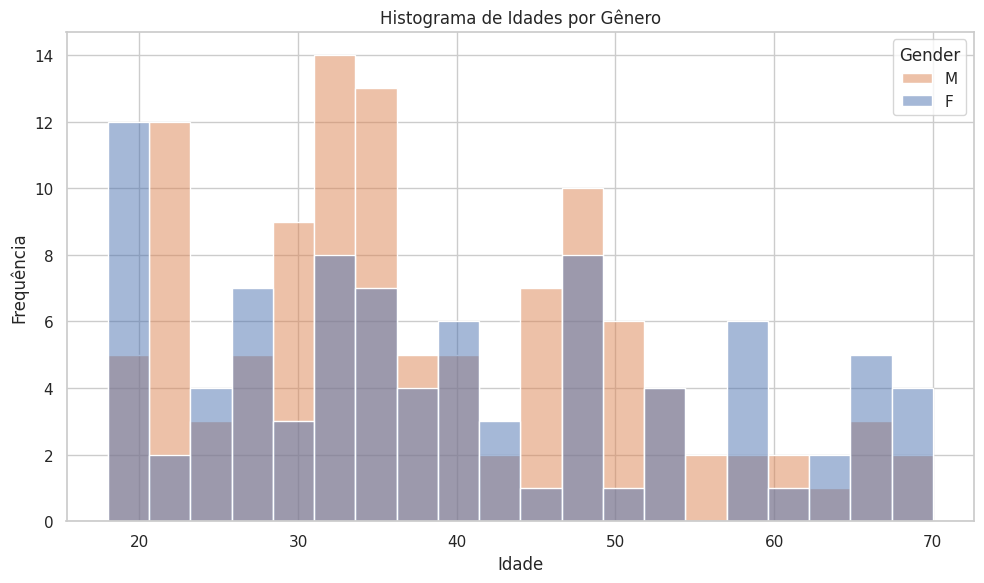

In [9]:
sns.set(style="whitegrid")

# Criar o histograma dividido por gênero, tendo em vista a idade
plt.figure(figsize=(10, 6))
sns.histplot(data=Mall, x="Age", hue="Gender", bins=20)

# Personalizar o gráfico
plt.title('Histograma de Idades por Gênero')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend(title='Gênero')
plt.tight_layout()

plt.legend(title='Gender', labels=['M', 'F'])

# Exibir o gráfico
plt.show()

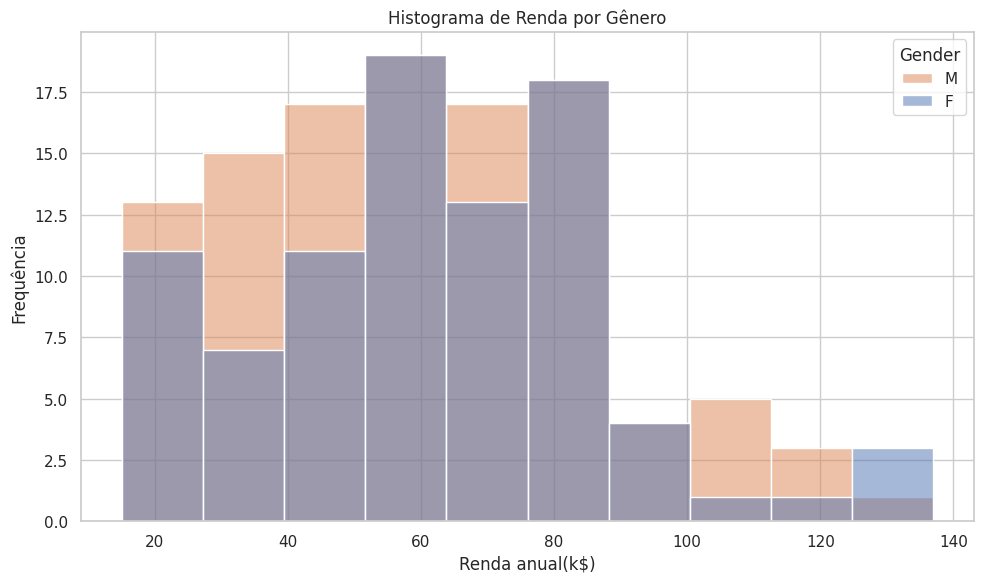

In [10]:
sns.set(style="whitegrid")

# Criar o histograma dividido por gênero tendo como variável a renda anual
plt.figure(figsize=(10, 6))
sns.histplot(data=Mall, x="Annual Income (k$)", hue="Gender")

# Personalizar o gráfico
plt.title('Histograma de Renda por Gênero')
plt.xlabel('Renda anual(k$)')
plt.ylabel('Frequência')
plt.legend(title='Gênero')
plt.tight_layout()

plt.legend(title='Gender', labels=['M', 'F'])

# Exibir o gráfico
plt.show()

Agora eu quero entender quais as correlações entre as varíaveis

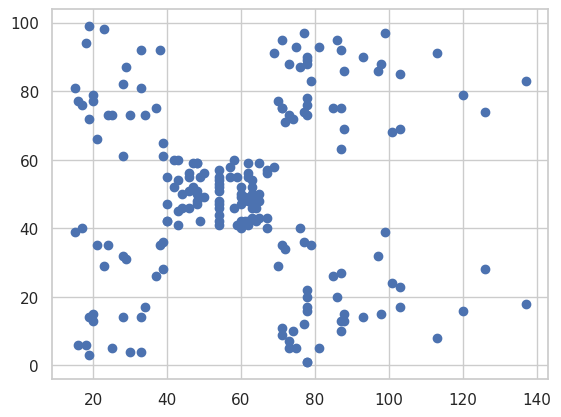

In [11]:
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=Mall)

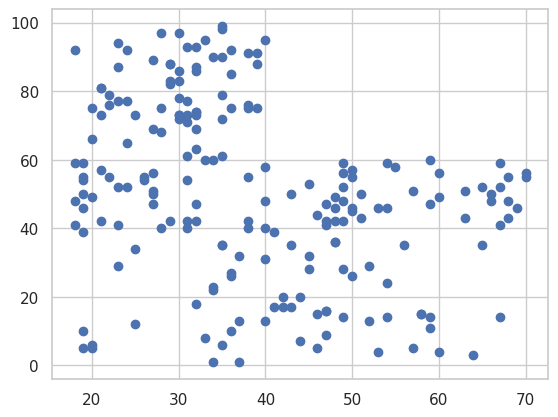

In [12]:
plt.scatter(x='Age', y='Spending Score (1-100)', data=Mall)

Não foi possível enxergar nenhuma correlação entre os parâmetros.
Agora, faremos uma clusterização para verificar quais são os grupos nos quais podemos subdividir o público deste shopping.

In [15]:
from yellowbrick.cluster import kelbow_visualizer
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans,DBSCAN,MeanShift
from sklearn.cluster import k_means,dbscan,mean_shift,estimate_bandwidth
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale,minmax_scale

In [17]:
Mall_LE=Mall.copy()
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Mall_LE['Gender']=LE.fit_transform(Mall_LE['Gender'])

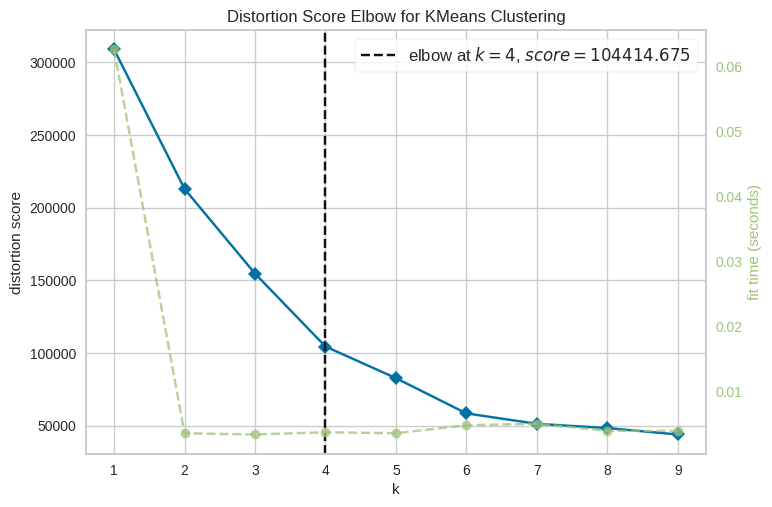

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9), k=(1, 10))

In [18]:
kelbow_visualizer(KMeans(),Mall_LE,k=(1,10))

Encontramos 4 clusters principais

In [19]:
model=KMeans(n_clusters=4)
model.fit(Mall_LE)
Mall_LE['Cluster']=model.fit_predict(Mall_LE)
Mall_LE.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,,
1,1,19,15,39,0
2,1,21,15,81,0
3,0,20,16,6,2
4,0,23,16,77,0
5,0,31,17,40,0


In [21]:
kmeans_labels=Mall_LE['Cluster']

In [23]:
px.scatter_3d(Mall_LE, x='Age', y='Annual Income (k$)', z='Gender', color=kmeans_labels.astype(str), template='plotly_dark')

In [22]:
px.scatter_3d(Mall_LE, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=kmeans_labels.astype(str), template='plotly_dark')

In [24]:
Mall_LE.groupby('Cluster').median()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.0,23.5,40.0,59.0
1,1.0,41.5,80.0,16.5
2,0.0,50.0,48.0,44.5
3,0.0,32.0,78.5,83.0


Características de cada cluster :
CLuster 0:  Podemos verificar um grupo que realiza muitas compras no shopping, não possui uma renda elevada e com uma demografia jovem, predominantemente de grupo feminino
CLuster 1: Podemos verificar um Cluster que não realiza muitas compras no shopping,  possui uma renda elevada e com uma demografia não tão jovem.É um grupo majoritariamente composto por homens  
CLuster 2: É um cluster similar ao primeiro cluster porém com uma idade mais elevada, e que realiza menos compras  no shopping
Cluster 3: É o cluster das clientes mais fiéis do shopping, contribuem bastante para a receita do shoppping, tem uma demográfia média de idade adulta, possuem elevada renda e elevados gastos no shopping





Intervenções para cada cluster
0:Por ser um grupo que ja realiza muitas compras no shopping e não possui uma renda elevada, geralmente esse grupo associa muitas compras em relação ao preço. Portanto para aumentar o cross seling é possível pensar na instalação do amazon locker para que caso peçam compras pela internet, vão ao shopping.  
1:Por ser o cluster majoritariamente masculino, realizar campanhas de marketing direcionadas a este público, para que ele se assemelhe e realize mais compras.
2:Envio de mensagens com promoções das lojas, para que as clientes vão ao shopping, comprem o relatado na promoção e comprem outras coisas mais  
3: É o tipo de cliente ideal do shopping. É a cliente que necessita ser fidelizada.Portanto  a ideia aqui é a partir de certa quantidade de dinheiro de compras anuais, o vallet do shopping passará a ser gratuito, ou quais quer outros benefícios.